**Application on the Iris data. The dataset consists of 150 instances, each with four numerical features measured in centimeters. There are three classes: Setosa, Versicolour, and Virginica.**

Load necessary packages

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

Plot the data

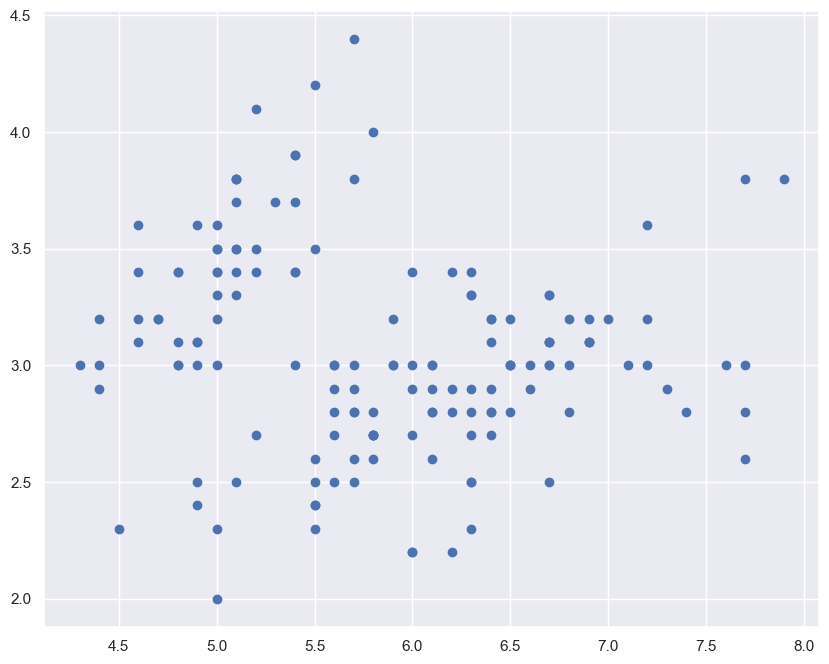

In [112]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])
plt.show()

We use three colors to indicate the three classes.

In [113]:
def colors(y):
    if y == 0:
        return "red"
    elif y == 1:
        return "lightseagreen"
    else:
        return "magenta"

c = [colors(label) for label in y]

Randomly select and plot three centroids

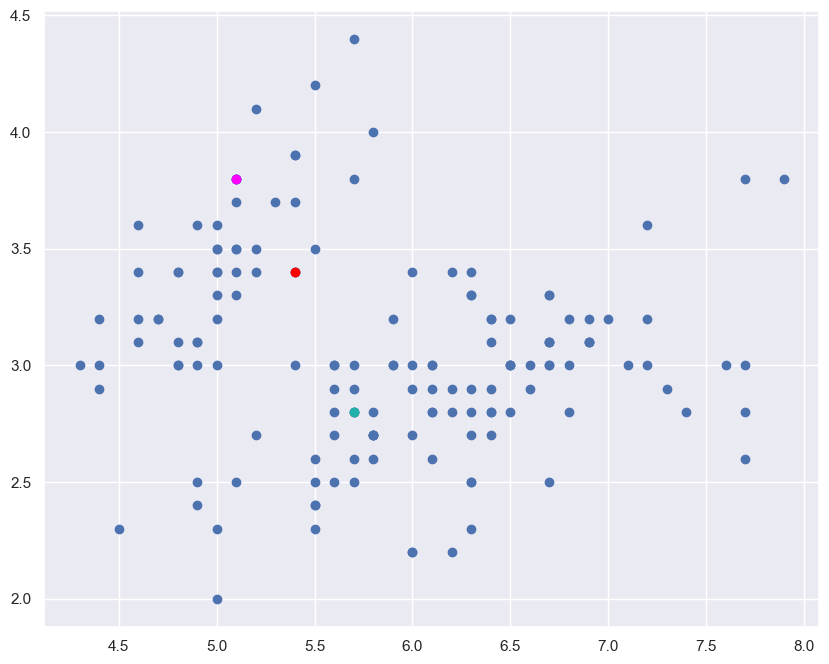

In [114]:
centers = []
for k in range(3):
    i = np.random.randint(0, 100)
    point = (X[i,0], X[i,1], k)
    centers.append(point)

plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])
plt.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
plt.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
plt.scatter([centers[2][0]], [centers[2][1]], color = "magenta", label = centers[2][2])
plt.show()

Build the distance function and assignment functions

In [115]:
def distance(i, X, center):
    return np.sqrt(sum((X[i, j] - center[j])**2 for j in range(2)))

def assign_label(i, X, centers):
    distances = np.array([distance(i, X, center) for center in centers])
    label = np.argmin(distances)
    return label 

def assign_clusters(X, centers):
    return [assign_label(i, X, centers) for i in range(len(X))]

Assign label and plot

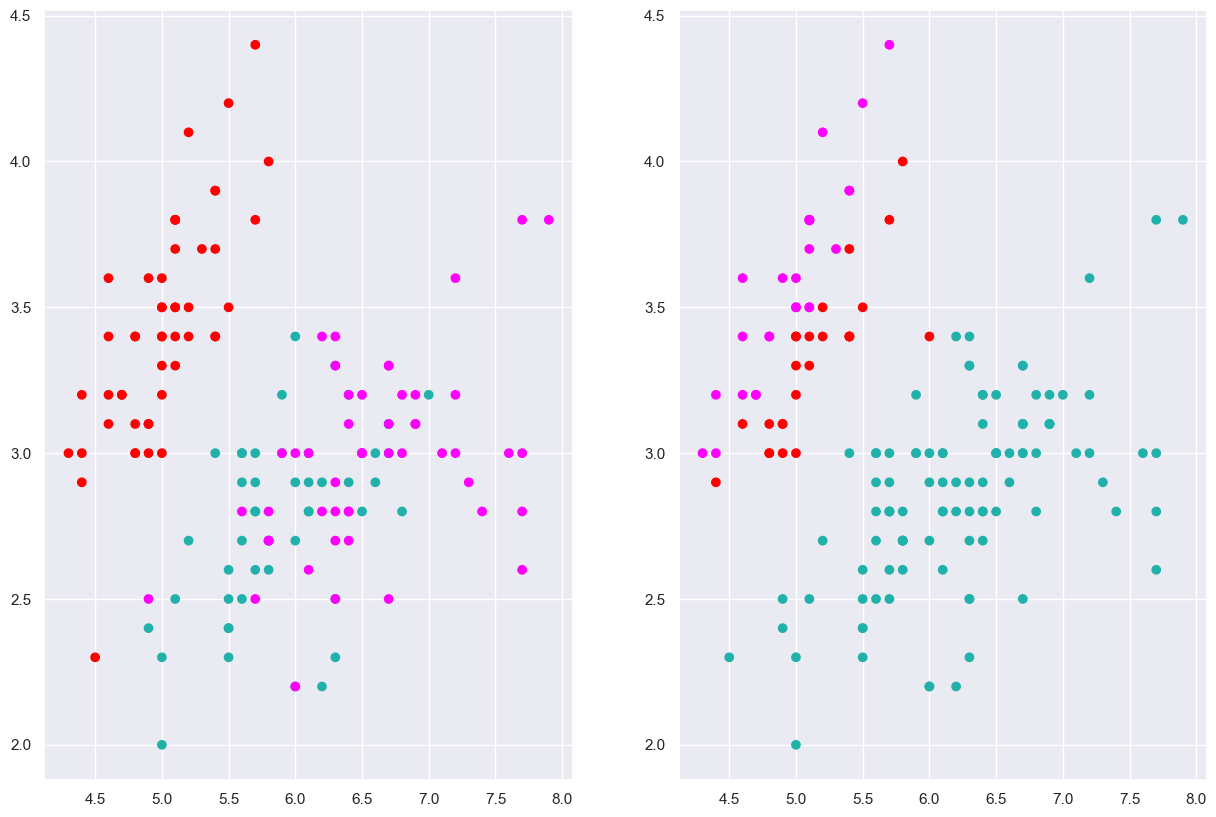

In [116]:
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
ax2.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
ax2.scatter([centers[2][0]], [centers[2][1]], color = "magenta", label = centers[2][2])

plt.show()

<span style="color: blue;">The first clustering is not good. We have to update the centroids and iterate.</span>

In [117]:
def update_centers(X, centers):
    current_labels = assign_clusters(X, centers)
    k = len(centers)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur
    
    return [(center_means[i][0], center_means[i][1]) for i in center_means]

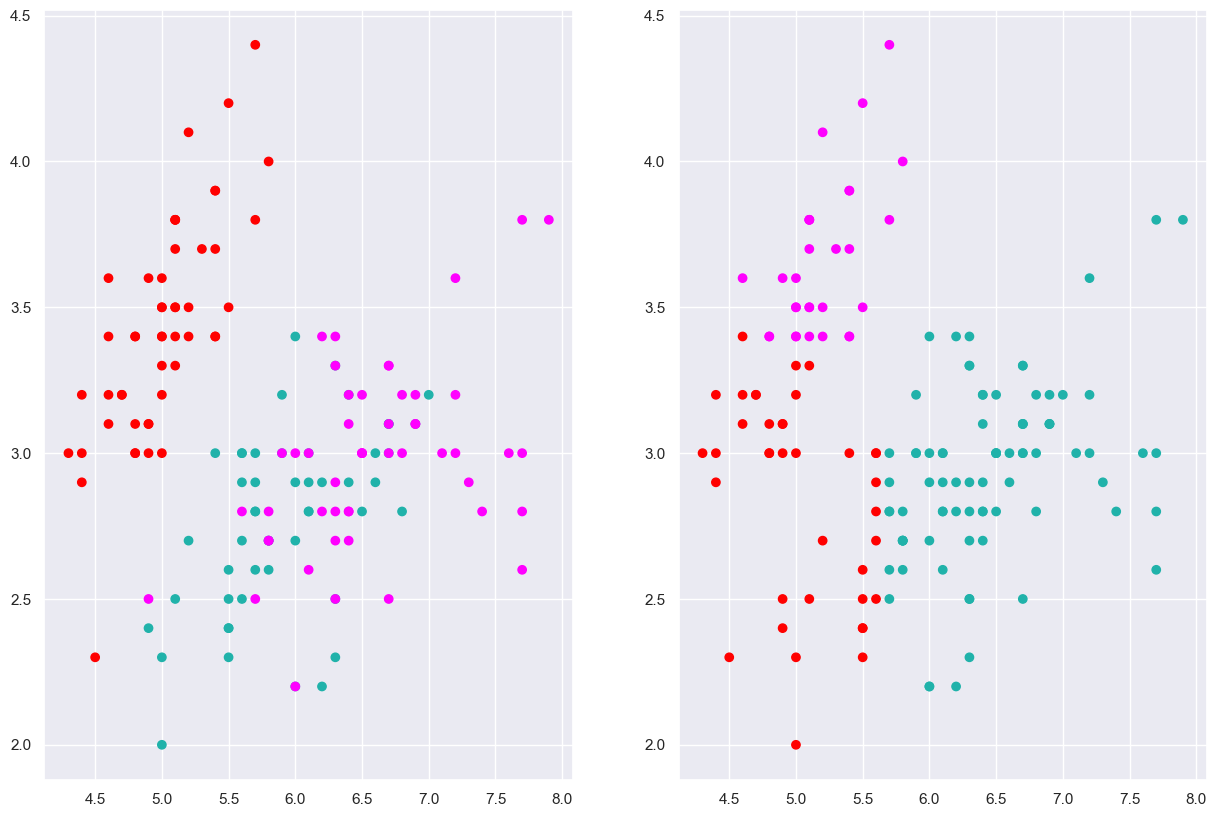

In [118]:
new_centers = update_centers(X, centers)
new_centers = update_centers(X, new_centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

<span style="color: blue;">After updating and iterating, the cluster performance improves. I will build the K-means clustering algorithm so that we can choose the iteration number.</span>

In [119]:
def k_means_clustering(X, k, max_iter = 100):
    centers = []
    for j in range(k):
        i = np.random.randint(0, 100)
        point = (X[i, 0], X[i, 1], j)
        centers.append(point)
    
    for _ in range(max_iter):
        centers = update_centers(X, centers)

    return centers

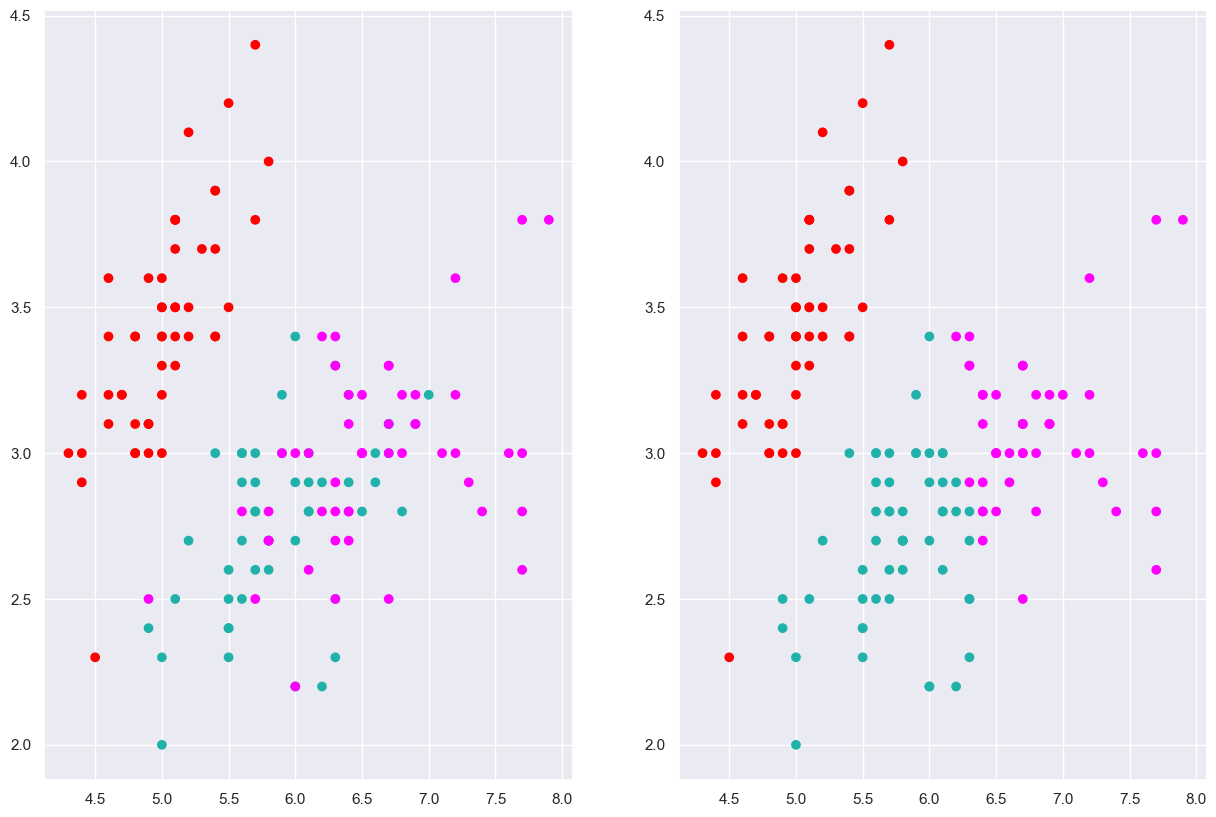

In [120]:
centers = k_means_clustering(X, 3)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

<span style="color: blue;">Our clustering results further improve.</span>

---

### Conclusion

In summary, we find that K-means helps clustering tasks. However, it cannot well cluster when clusters are **not** spherical.